# Linear Regression E-Commerce

In this exercise we will use the data of an Ecommerce company that sells clothes based in New York. Customers can order either either on a mobile app or website the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. 

## Imports

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
% matplotlib inline

## Data

We'll work with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 


In [2]:
df = pd.read_csv('Ecommerce Customers')
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


In [4]:
# Statistics about the dataset
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## Exploratory Data Analysis


Now we use a jointplot to explore the relation between the Time on Website and the Yearly Amount Spent

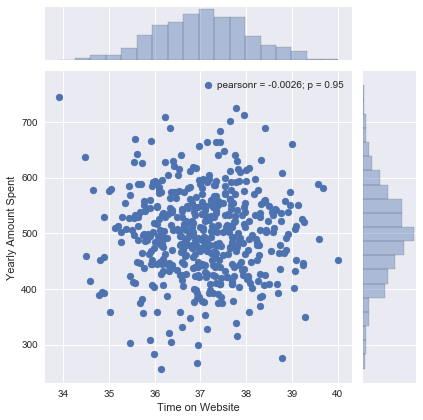

In [7]:
sns.set()
plt.rcParams["patch.force_edgecolor"] = True
sns.jointplot(x = 'Time on Website', y = 'Yearly Amount Spent', data = df)

Now we do the same but with the Time on App column instead

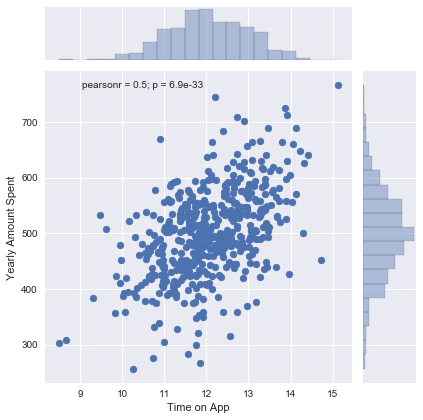

In [10]:
sns.jointplot(x = 'Time on App', y = 'Yearly Amount Spent', data = df)

Use jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.

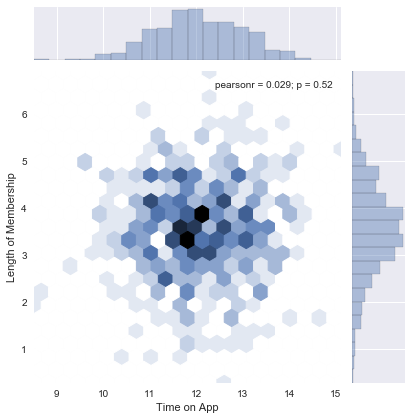

In [11]:
sns.jointplot(x = 'Time on App', y = 'Length of Membership', data = df, kind = 'hex')

Finally we use the pairplot on all the dataset to see the relationships among all the variables

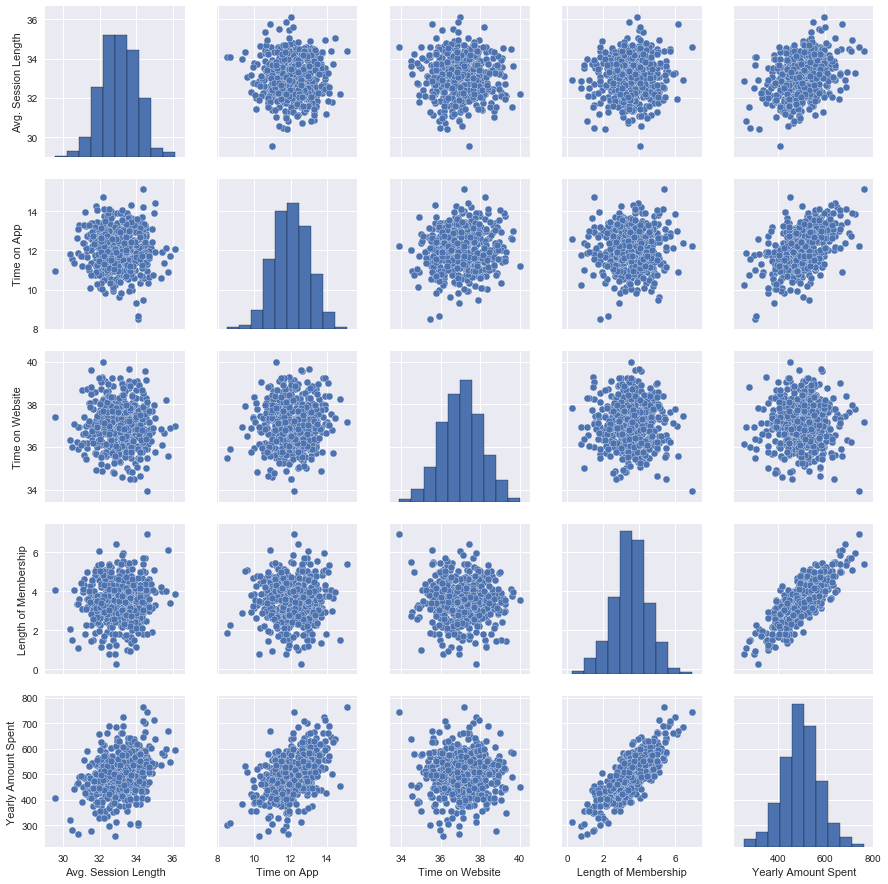

In [12]:
sns.pairplot(df)

From this graph we can see that the Length of Membership is very correlated with the Yearly Amount Spent

For this reason we create a linear model plot of  Yearly Amount Spent vs. Length of Membership. 

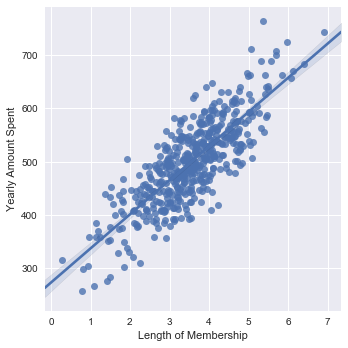

In [14]:
sns.lmplot(x = 'Length of Membership', y = 'Yearly Amount Spent', data = df, )

## Training and Testing Data

Now that we've explored the data a bit, we can go ahead and split the data into training and testing sets.
We will set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column.

In [16]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [33]:
# Keep only the numerical features
X = df[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]
X.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308


In [34]:
y = df['Yearly Amount Spent']
y.head()

0    587.951054
1    392.204933
2    487.547505
3    581.852344
4    599.406092
Name: Yearly Amount Spent, dtype: float64

Let's split the data into training and testing sets. We set the test_size = 0.3 

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training the Model

Now we can train our model on our training data


In [36]:
lm = LinearRegression()
# Fit the linear regression model on the training set
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [37]:
# Coefficients
print('Coefficients:')
print(lm.coef_)

Coefficients:
[ 25.98154972  38.59015875   0.19040528  61.27909654]


## Predictions
Now that we have fit our model, we can evaluate its performance by predicting off the test values


In [39]:
predictions = lm.predict(X_test)

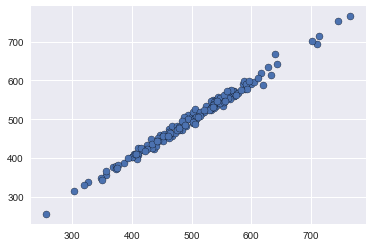

In [40]:
# Plot the predicted data
plt.scatter(y_test, predictions, edgecolors = 'black' )

## Results Evaluation

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

We Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error

In [41]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7.22814865343
MSE: 79.813051651
RMSE: 8.93381506698


## Residuals
Now we finally quickly explore the residuals to check if they are normally distributed

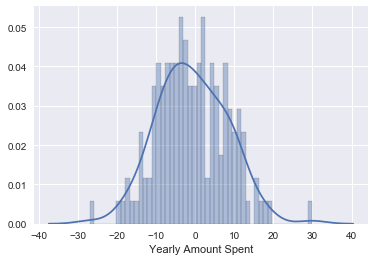

In [45]:
residuals = y_test - predictions
sns.distplot(residuals, bins = 50)

## Conclusion

In [46]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


Coefficients interpretation:

- Holding all other features fixed, a 1 unit increase in **Avg. Session Length** is associated with an **increase of 25.98 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on App** is associated with an **increase of 38.59 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on Website** is associated with an **increase of 0.19 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Length of Membership** is associated with an **increase of 61.27 total dollars spent**.

In conclusion there are two main solutions:

- Develop the Website to catch up to the performance of the mobile app
- develop the app more since that is what is working better. 

The answer really depends on the other factors going on at the company